In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (make sure the CSV is in the same folder as the notebook)
data = pd.read_csv('P1_Composite.csv')


In [3]:
# Identify columns with all zero values
zero_columns = data.columns[(data == 0).all()]

# Print the names of columns with all zero values
print("Columns with all zero values:")
for column in zero_columns:
    print(column)

# Remove columns with all zero values
data_no_zeros = data.drop(columns=zero_columns)


Columns with all zero values:
Pelvis_x
Pelvis_y
Pelvis_z
RMS_Pelvis_xy
RMS_Pelvis_yz
RMS_Pelvis_zx
RMS_Pelvis_xyz
Roll_Pelvis
Pitch_Pelvis


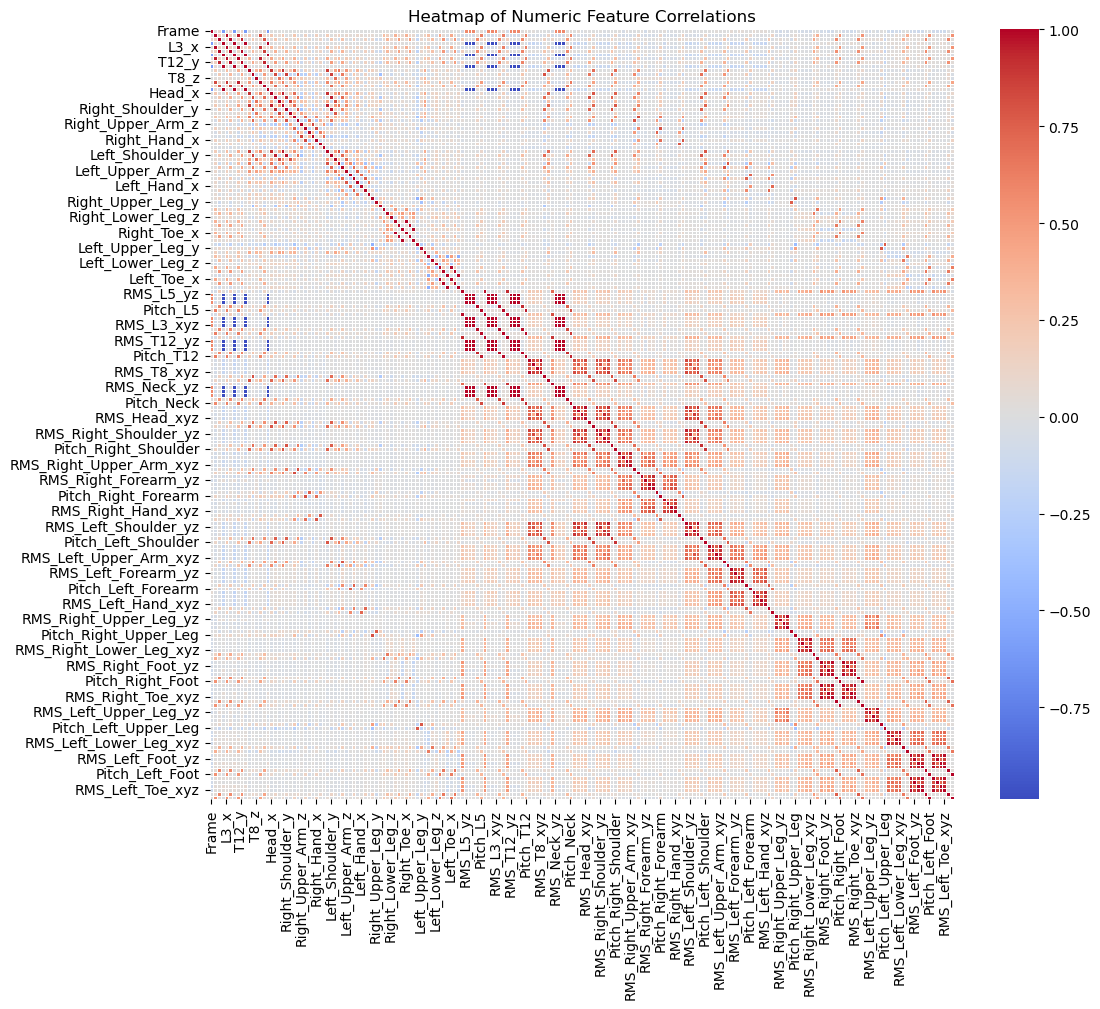

In [14]:
# Select only the numeric columns for correlation analysis
numeric_data = data_no_zeros.select_dtypes(include=[np.number])

# Plot a heatmap of the correlations to visually inspect redundant columns
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_data.corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Numeric Feature Correlations')
plt.show()


In [17]:
# Set a threshold for the correlation to define "redundant"
correlation_matrix = numeric_data.corr().abs()

# Select upper triangle of the correlation matrix
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Drop columns with high correlation (e.g., > 0.95)
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.95)]

# Print the names of columns being dropped due to high correlation
print("\nColumns to be dropped due to high correlation (> 0.95):")
for column in to_drop:
    print(column)

# Drop the redundant numeric columns from the numeric subset
numeric_data_reduced = numeric_data.drop(columns=to_drop)

# Recombine the reduced numeric columns with the original non-numeric columns
non_numeric_data = data_no_zeros.select_dtypes(exclude=[np.number])
data_reduced = pd.concat([numeric_data_reduced, non_numeric_data], axis=1)

# Optional: Display the reduced data
print(data_reduced.head())



Columns to be dropped due to high correlation (> 0.95):
L3_x
L3_y
L3_z
T12_x
T12_y
T12_z
Neck_z
Left_Shoulder_x
Left_Shoulder_y
Right_Toe_x
Right_Toe_y
Right_Toe_z
Left_Toe_x
Left_Toe_y
Left_Toe_z
RMS_L5_yz
RMS_L5_zx
RMS_L5_xyz
RMS_L3_xy
RMS_L3_yz
RMS_L3_zx
RMS_L3_xyz
Roll_L3
Pitch_L3
RMS_T12_xy
RMS_T12_yz
RMS_T12_zx
RMS_T12_xyz
Roll_T12
Pitch_T12
RMS_T8_xyz
RMS_Neck_yz
RMS_Neck_zx
RMS_Neck_xyz
RMS_Head_xyz
RMS_Right_Shoulder_xyz
RMS_Right_Forearm_xyz
RMS_Left_Shoulder_xy
RMS_Left_Shoulder_xyz
RMS_Left_Upper_Arm_xyz
RMS_Left_Forearm_xyz
RMS_Right_Upper_Leg_xyz
RMS_Right_Lower_Leg_xyz
RMS_Right_Foot_xyz
RMS_Right_Toe_xy
RMS_Right_Toe_yz
RMS_Right_Toe_zx
RMS_Right_Toe_xyz
Roll_Right_Toe
Pitch_Right_Toe
RMS_Left_Upper_Leg_xyz
RMS_Left_Lower_Leg_xyz
RMS_Left_Foot_xyz
RMS_Left_Toe_xy
RMS_Left_Toe_yz
RMS_Left_Toe_zx
RMS_Left_Toe_xyz
Roll_Left_Toe
Pitch_Left_Toe
   Frame      L5_x      L5_y      L5_z      T8_x      T8_y      T8_z  \
0      0  0.016263 -0.095142  0.221275 -0.000439 -0.090732 

In [19]:
# Save the final reduced dataset into a new CSV file
data_reduced.to_csv('P1_Composite_reduced.csv', index=False)

# Confirming the file save location
print("Dataset saved as 'P1_Composite_reduced.csv'")


Dataset saved as 'P1_Composite_reduced.csv'
